In [1]:
import pickle

import matplotlib.pyplot as plt

from collections import Counter

from Week2_Rydberg_Atoms.utils import int_to_bin, sanity_check, int_to_bin_str
from julia_run_quantum_annealing import run_annealing, measure, get_edges
from draw_graph import draw_graph, draw_multi_graph

/home/gwonhaklee/workspace/CohortProject_2021/venv/lib/python3.8/site-packages/julia/core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


In [2]:
graph = [
    (1.19, 4.25),
    (2.71, 3.48),
    (1.19, 3.51),
    (2.00, 3.38),
    (1.12, 2.86),
    (1.70, 2.42),
    (2.36, 2.54),
    (1.52, 1.48),
    (2.15, 1.54),
    (2.14, 1.87),
    (1.72, 0.86),
    (2.29, 0.87),
]
edges = get_edges(graph)
dt = 0.001
num_vertices = len(graph)

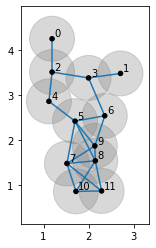

In [3]:
draw_graph(graph, radius=0.5)

In [4]:
psi = run_annealing(graph, edges, dt)


In [5]:
nshots = 10000
samples = [s for s in measure(psi, nshots=nshots)]
occurrence = Counter(samples)
max_occ = sorted([k for k in occurrence], key=lambda k: occurrence[k], reverse=True)
for k in max_occ:
    print(f"{int_to_bin_str(k, num_vertices)} : {occurrence[k]}")

010001010011 : 1757
100001010011 : 1747
101000010011 : 1268
011000010011 : 1220
000101010011 : 963
000011010011 : 945
101000011001 : 328
011000011001 : 306
000001010011 : 129
101001010011 : 99
011001010011 : 92
110001010011 : 72
111000010011 : 68
000100011001 : 51
000010011001 : 44
101000011011 : 43
011000011011 : 43
000111010011 : 35
000011000110 : 34
111000011001 : 33
100101010011 : 33
010011010011 : 32
010001000110 : 32
010101010011 : 32
010000101001 : 31
001000011001 : 30
011000010010 : 28
101000010010 : 27
100011010011 : 27
000101000110 : 26
001000010011 : 26
100001000110 : 24
100000011001 : 19
010000011001 : 18
011000000110 : 18
100000101001 : 18
010001000011 : 16
100001000011 : 15
101000001001 : 14
101000000110 : 14
101000000011 : 12
011000001001 : 11
011000011000 : 11
010001010010 : 10
011000000011 : 8
101000011000 : 8
010000100110 : 8
100000100011 : 8
101000010001 : 7
100001010001 : 7
010000010011 : 7
000100010011 : 6
011000010001 : 6
010000100011 : 5
010001010001 : 5
10000001

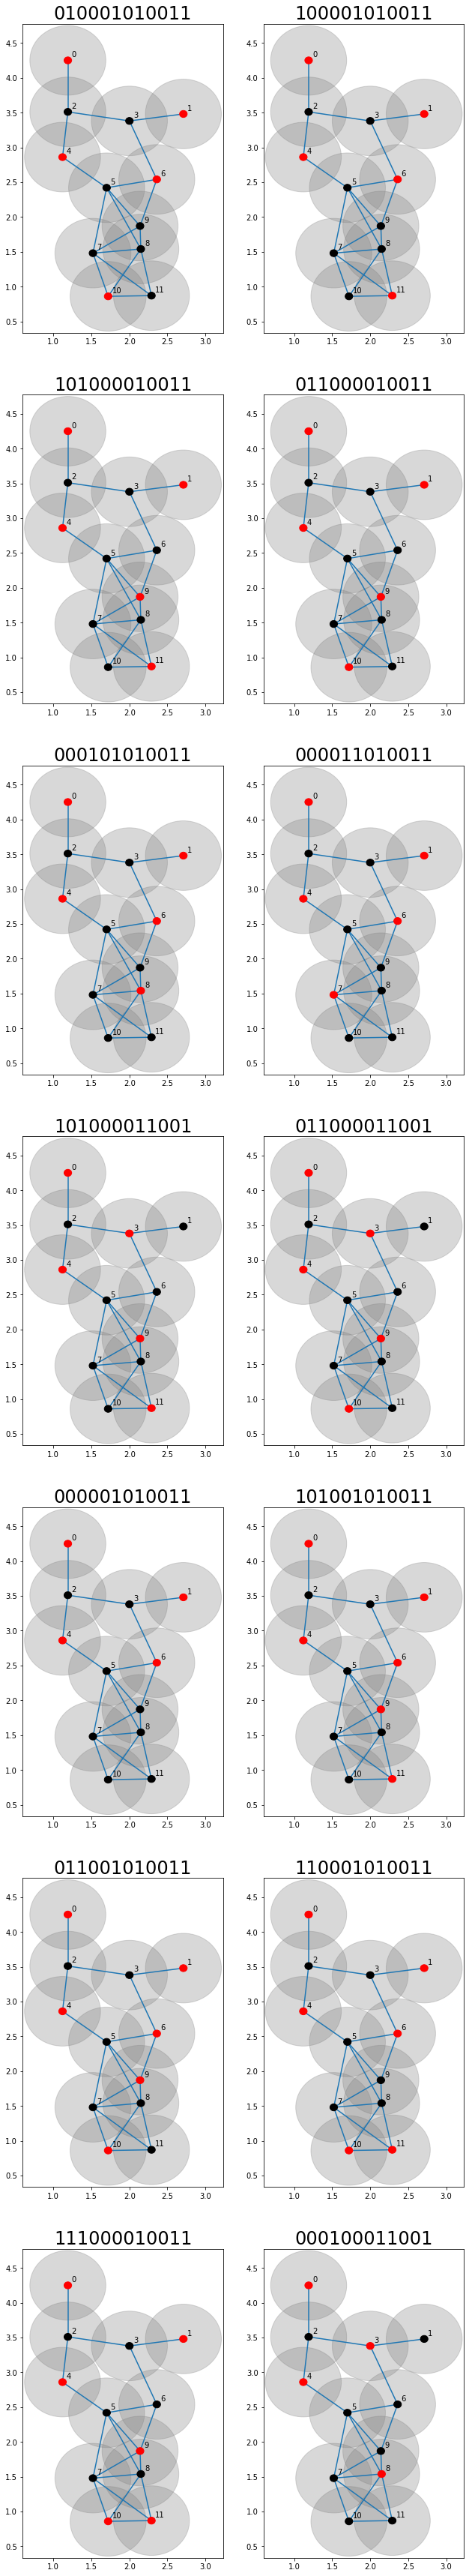

In [6]:
num_draw = 14
frequent_answers = [int_to_bin(x, len(graph)) for x in max_occ[:num_draw]]
draw_multi_graph(graph,
                 radius=0.5,
                 answer_list=frequent_answers,
                 titles=[int_to_bin_str(x, len(graph)) for x in max_occ[:num_draw]])

In [7]:
max_num_v = 5
not_valid_ans = list()
not_max_ans = list()
correct_ans = list()
for a in max_occ:
    valid, num_v =sanity_check(graph, answer=int_to_bin(a, num_vertices), radius=0.5)
    if not valid:
        not_valid_ans.append(a)
    elif num_v != max_num_v:
        not_max_ans.append(a)
    else:
        correct_ans.append(a)
pr_not_valid = sum([occurrence[k] for k in not_valid_ans])/nshots
pr_not_max = sum([occurrence[k] for k in not_max_ans])/nshots
pr_correct = sum([occurrence[k] for k in correct_ans])/nshots
print(f"probability to find correct answers    : {pr_correct}")
print(f"probability to find invalid answers    : {pr_not_valid}")
print(f"probability to find suboptimal answers : {pr_not_max}")

probability to find correct answers    : 0.8534
probability to find invalid answers    : 0.069
probability to find suboptimal answers : 0.0776


In [8]:
pkl_file = "./simulations/task3_verbose.txt"
with open(pkl_file, 'rb') as of:
    data = pickle.load(of)
dt_list = [dt for dt in data]
pr_list = list()
for dt in data:
    occurrence_dt = data[dt]
    n_shots_dt = sum([occurrence_dt[k] for k in occurrence_dt])
    pr_correct_dt = 0
    for k in occurrence_dt:
        valid, num_v = sanity_check(graph, answer=int_to_bin(k, num_vertices), radius=0.5)
        if valid and num_v == max_num_v:
            pr_correct_dt += occurrence_dt[k]
    pr_correct_dt /= n_shots_dt
    pr_list.append(pr_correct_dt)

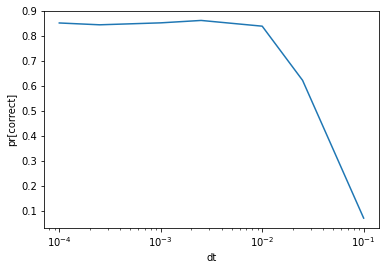

In [12]:
plt.plot(dt_list, pr_list)
plt.xlabel("dt")
plt.ylabel("pr[correct]")
plt.xscale('log')